# Median Filter
Sporadic diagnostic imprecisions either due to neutron activity, electronic pick-up or acquisition system failure may occur with some frequency. The number of faults in the data is proportional to the amount of data to be acquired. Long discharges may result in vast amounts of corrupted data. To compensate for such eventualities, several software tools can be used in post-processing. Such is the case of the median filter, when filtering iso-density layers. The filter is simple, but highly effective, as long as the "bad data" fraction is smaller than the "good data". A sliding window of an odd number $N$ of points considers the $\frac{N-1}{2}$ preceding and following points of the current position along every density layer. These values are sorted numerically and the output is just the middle value of the list.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from scipy.signal import medfilt
#
from matplotlib import rc
plt.style.use('helvet')
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{tgheros}',    # helvetica font
    r'\usepackage{sansmath}',   # math-font matching  helvetica
    r'\sansmath'                # actually tell tex to use it!
    r'\usepackage{siunitx}',    # micro symbols
    r'\sisetup{detect-all}',    # force siunitx to use the fonts
]
#

Load data for this example:

In [31]:
shotnr = 29865
lfs = np.loadtxt('../data/iso_lfs_lmode.dat')
#lfs = np.loadtxt('../data/iso_lfs_33990.dat')

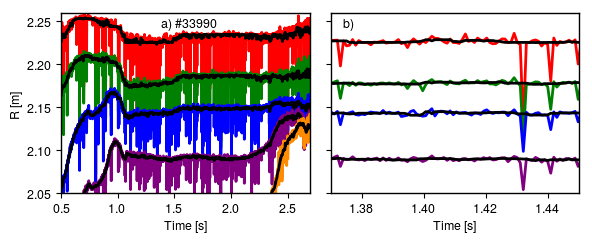

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,2.5), dpi=100)

lbl=0
for i in range(1,10, 2):
    ax[0].plot(lfs[500:,0], lfs[500:,i],lw=2)
    ax[0].plot(lfs[500:,0], medfilt(lfs[500:,i], 11), color='k', lw=2)
    lbl = lbl+1
    
ax[0].set_xlim(0.5, 2.7)

lbl=0
for i in range(1,10, 2):
    ax[1].plot(lfs[500:,0], lfs[500:,i],lw=2)
    ax[1].plot(lfs[500:,0], medfilt(lfs[500:,i], 11), color='k',lw=2)
    lbl = lbl+1

ax[0].text(0.4,0.92,'a) \#33990', transform=ax[0].transAxes)
ax[1].text(0.05,0.92,'b)', transform=ax[1].transAxes)
ax[1].set_xlim(1.37, 1.45)
#ax[1].set_xlim(2, 2.1)
ax[1].set_ylim(2.05, 2.26)
ax[0].set_ylabel('R [m]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
plt.tight_layout()
#plt.subplots_adjust(wspace=0.03)
#ax[0].text(0.03, 0.05, 'a)', transform=ax[0].transAxes)
#ax[1].text(0.03, 0.05, 'b)', transform=ax[1].transAxes)
plt.savefig("figures/Median_filter.png", dpi=300)

An 11 point window (also called kernel), was applied originally to several density layers for an L-mode discharge. As it is possible to see in the close-up, in the right, signal faults are not as frequent as the image on the left leads to believe. When analyzing large amounts of data, one must careful to verify the effect of time-scales, as graphical aliasing can occur. A short number of sporadic diagnostic faults may lead us to believe large amounts of data are corrupted. For the analysis of density layers, the median filter is best used in L-mode discharges, as the nature of ELMs requires a more robust approach. In type-III ELM situations (heavy Nitrogen seeding, for example) it may also be possible to use this approach but the window size must be chosen according to the ratios between diagnostic acquisition frequency and ELM frequency. Also, due to its nature, the median filter is a post-processing tool only, as it requires future information.

In [2]:
import dd
shotnr=29865
rdl = dd.shotfile('RDL', shotnr)
lfs = rdl('LFSR')
hfs = rdl('HFSR')
rdl.close()

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


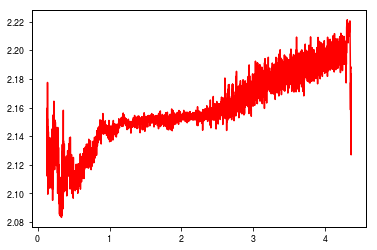

In [3]:
plt.plot(lfs.time,lfs.data[:,1])
plt.show()

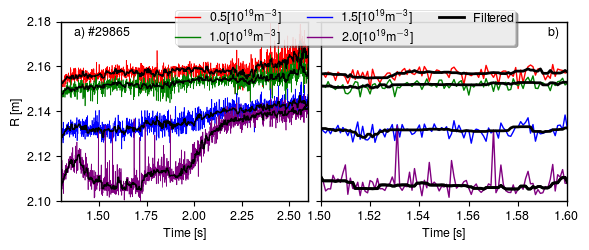

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,2.5), dpi=100)

lays = 4
labelstr = [r'$\mathrm{0.5[10^{19}m^{-3}]}$',
            r'$\mathrm{1.0[10^{19}m^{-3}]}$',
            r'$\mathrm{1.5[10^{19}m^{-3}]}$',
            r'$\mathrm{2.0[10^{19}m^{-3}]}$']

for i in range(lays):
    ax[0].plot(lfs.time, lfs.data[:,i],lw=0.5)
    ax[0].plot(lfs.time, medfilt(lfs.data[:,i], 11), color='k', lw=1, zorder=10)
    #lbl = lbl+1
    
ax[0].set_xlim(1.3, 2.6)

for i in range(lays):
    ax[1].plot(lfs.time, lfs.data[:,i],lw=1,label=labelstr[i])
    ax[1].plot(lfs.time, medfilt(lfs.data[:,i], 11), color='k', lw=2, zorder=10)

ax[1].plot(lfs.time, medfilt(lfs.data[:,3], 11), color='k', lw=2, zorder=10,label='Filtered')
    
ax[0].text(0.05,0.92,'a) \#'+str(shotnr), transform=ax[0].transAxes)
ax[1].text(0.92,0.92,'b)', transform=ax[1].transAxes)
ax[1].set_xlim(1.5, 1.6)
#ax[1].set_xlim(2, 2.1)
ax[1].set_ylim(2.1, 2.18)
ax[0].set_ylabel('R [m]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[1].legend(loc='upper center', bbox_to_anchor=(0.1, 1.1),
          ncol=3, fancybox=True, shadow=True, borderpad=0.02)
plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
#ax[0].text(0.03, 0.05, 'a)', transform=ax[0].transAxes)
#ax[1].text(0.03, 0.05, 'b)', transform=ax[1].transAxes)
plt.savefig("figures/Median_filter.png", dpi=300)